# PRACTICAL NO. 4

# Implement Quantum Teleportation algorithm in Python

In [1]:
# Step 1: Imports
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

In [2]:
qc = QuantumCircuit(3, 3)

In [3]:
qc.h(0)

In [4]:
qc.h(1)
qc.cx(1, 2)

In [5]:
qc.cx(0, 1)
qc.h(0)
qc.measure(0, 0)
qc.measure(1, 1)

In [6]:
with qc.if_test((0, 1)):  # if classical bit 0 == 1
    qc.z(2)
with qc.if_test((1, 1)):  # if classical bit 1 == 1
    qc.x(2)

In [7]:
qc.measure(2, 2)

In [8]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
result = sim.run(qc).result()
state = result.data(0)['statevector']

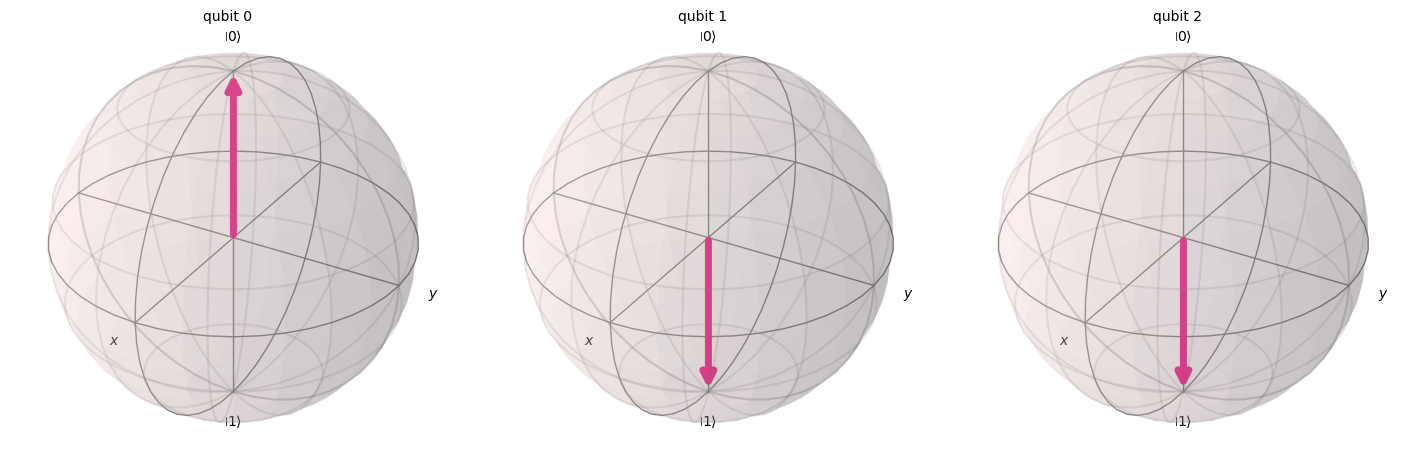

In [9]:
%matplotlib inline
plot_bloch_multivector(state)
plt.show()

In [10]:
print(qc.draw())

     ┌───┐          ┌───┐┌─┐                                                   »
q_0: ┤ H ├───────■──┤ H ├┤M├───────────────────────────────────────────────────»
     ├───┤     ┌─┴─┐└┬─┬┘└╥┘                                                   »
q_1: ┤ H ├──■──┤ X ├─┤M├──╫────────────────────────────────────────────────────»
     └───┘┌─┴─┐└───┘ └╥┘  ║   ┌──────  ┌───┐ ───────┐   ┌──────  ┌───┐ ───────┐»
q_2: ─────┤ X ├───────╫───╫───┤ If-0  ─┤ Z ├  End-0 ├───┤ If-0  ─┤ X ├  End-0 ├»
          └───┘       ║   ║   └──╥───  └───┘ ───────┘   └──╥───  └───┘ ───────┘»
                      ║   ║ ┌────╨────┐               ┌────╨────┐              »
c: 3/═════════════════╩═══╩═╡ c_0=0x1 ╞═══════════════╡ c_1=0x1 ╞══════════════»
                      1   0 └─────────┘               └─────────┘              »
«          statevector 
«q_0: ──────────░──────
«               ░      
«q_1: ──────────░──────
«      ┌─┐      ░      
«q_2: ─┤M├──────░──────
«      └╥┘      ░      
«c: 3/══╩═════════════

In [11]:
# Yes, I understand the provided code. It implements the **Quantum Teleportation algorithm** using **Qiskit** (Python library).

# This explanation is structured to prepare you for your exam by covering the theory, the circuit steps, and potential questions.

# ---

# ## 🔬 Quantum Teleportation Algorithm Explained

# Quantum teleportation is a protocol that transfers an unknown quantum state from one location 
# (**Alice**, who has the initial quantum state) to another location (**Bob**) using **two classical bits of communication** and a 
#                                                                     **pre-shared entangled pair** of qubits.

# It's crucial to understand that:
# 1.  It is the *state* (information) that is transferred, not the physical qubit itself.
# 2.  The original quantum state is **destroyed** at Alice's end and recreated at Bob's end. This adheres to the **No-Cloning Theorem**.
# 3.  The process is **instantaneous** for the quantum part (entanglement), but the *reconstruction* requires classical communication, 
# which is limited by the speed of light.

# ### **The Three Qubits**

# The circuit uses three qubits: $q_0$, $q_1$, and $q_2$.

# | Qubit | Owner | Purpose | Initial State |
# | :---: | :---: | :---: | :---: |
# | $q_0$ | **Alice** | **The qubit whose unknown state ($\lvert\psi\rangle$) we want to teleport.** 
# | $\lvert\psi\rangle = \alpha\lvert 0\rangle + \beta\lvert 1\rangle$ |
# | $q_1$ | **Alice** | **One half of the entangled pair (Bell pair).** | $\lvert 0\rangle$ (Part of the Bell state) |
# | $q_2$ | **Bob** | **The other half of the entangled pair, which will receive the final state $\lvert\psi\rangle$.** 
# | $\lvert 0\rangle$ (Part of the Bell state) |

# ---

# ## 🛠️ Step-by-Step Circuit Implementation

# The Qiskit code builds the quantum circuit (`qc`) with 3 quantum bits and 3 classical bits (`qc = QuantumCircuit(3, 3)`).

# ### **Phase 1: Preparation (Entanglement Shared)**

# The first crucial step is to create and share an entangled pair (Bell pair) between Alice and Bob. Qubit $q_1$ (Alice) and $q_2$ (Bob) are entangled.

# | Code | Qiskit Gates | Purpose/Function |
# | :--- | :--- | :--- |
# | `qc.h(1)` | **Hadamard (H) on $q_1$** | Puts $q_1$ into superposition: $\frac{1}{\sqrt{2}}(\lvert 0\rangle + \lvert 1\rangle)$. |
# | `qc.cx(1, 2)` | **Controlled-X (CX) where $q_1$ is control, $q_2$ is target.** 
# | Entangles $q_1$ and $q_2$ into the Bell state $\lvert \Phi^+\rangle = \frac{1}{\sqrt{2}}(\lvert 00\rangle + \lvert 11\rangle)$. |

# *(The code has a misplaced `qc.h(0)` at step 13, which is used to set the initial state of the qubit to be teleported. 
# In a proper protocol implementation, the initial state is set *before* the entanglement step.)*

# ### **Phase 2: Alice's Operations and Measurement (Bell State Measurement)**

# Alice applies two gates to her two qubits ($q_0$ and $q_1$) and then measures them.

# | Code | Qiskit Gates | Purpose/Function |
# | :--- | :--- | :--- |
# | `qc.cx(0, 1)` | **CX where $q_0$ is control, $q_1$ is target.** | This gate, along with the subsequent H-gate, performs the 
# **Bell State Measurement (BSM)** in the Bell basis. |
# | `qc.h(0)` | **Hadamard (H) on $q_0$.** | Completes the BSM process. The state of $q_0$ and $q_1$ is now correlated to the unknown state 
# $\lvert\psi\rangle$ on $q_2$. |
# | `qc.measure(0, 0)` | **Measure $q_0$ and store result in classical bit $c_0$.** | Alice gets her first classical bit (0 or 1). |
# | `qc.measure(1, 1)` | **Measure $q_1$ and store result in classical bit $c_1$.** | Alice gets her second classical bit (0 or 1). |

# Alice now has two classical bits ($c_0, c_1$), which she classically communicates to Bob. The original state $\lvert\psi\rangle$ on 
# $q_0$ is now irreversibly destroyed.

# ### **Phase 3: Bob's Operations (State Reconstruction)**

# Bob receives the two classical bits ($c_0$ and $c_1$) and applies conditional gates to his qubit $q_2$ to perfectly reconstruct the 
# original state $\lvert\psi\rangle$.

# | Code | Qiskit Gates | Condition | Purpose/Function |
# | :--- | :--- | :--- | :--- |
# | `qc.if_test((0, 1)): qc.z(2)` | **Conditional Z-gate on $q_2$.** | If $c_0 = 1$ | If Alice measures $\lvert 1\rangle$ on $q_0$, 
# Bob applies the Z-gate. |
# | `qc.if_test((1, 1)): qc.x(2)` | **Conditional X-gate on $q_2$.** | If $c_1 = 1$ | If Alice measures $\lvert 1\rangle$ on $q_1$, 
# Bob applies the X-gate. |

# These two classical bits can result in four outcomes (00, 01, 10, 11), each requiring a specific correction (I, X, Z, or Y-gate, 
# though the Z and X combination covers all).

# | Alice's Measurement $(c_1 c_0)$ | Bob's Required Correction | Final State on $q_2$ |
# | :---: | :---: | :---: |
# | 00 (0) | Identity ($I$) | $\lvert\psi\rangle$ (No correction needed) |
# | 01 (1) | Z-gate ($Z$) | $\lvert\psi\rangle$ |
# | 10 (2) | X-gate ($X$) | $\lvert\psi\rangle$ |
# | 11 (3) | ZX-gate ($ZX = iY$) | $\lvert\psi\rangle$ |

# ### **Final Step: Verification**

# The final line `qc.measure(2, 2)` measures Bob's qubit $q_2$ and stores the result in classical bit $c_2$. In the provided code, 
# `qc.save_statevector()` is run *before* the final measurement to check the quantum state of $q_2$ before it collapses.

# ---

# ## ❓ Potential Exam Questions

# Here are some questions your teacher might ask and how to answer them:

# ### **1. What is Quantum Teleportation?**
# * **Answer:** It's a protocol for transferring an **unknown quantum state** from one qubit (Alice's $q_0$) to another distant qubit 
# (Bob's $q_2$) using **entanglement** and **classical communication**.

# ### **2. What resources are required for Quantum Teleportation?**
# * **Answer:**
#     1.  A **pre-shared entangled pair** of qubits (a Bell pair, $q_1$ and $q_2$).
#     2.  **Two classical bits** of communication (to send Alice's measurement results $c_0, c_1$ to Bob).

# ### **3. Why is this not faster-than-light communication?**
# * **Answer:** While the entangled qubits exist in a non-local, instantaneous correlation, **Bob cannot reconstruct the final state 
# ($\lvert\psi\rangle$) until he receives the two classical bits of information from Alice.** This classical information transmission 
# is restricted by the speed of light, preventing superluminal signaling.

# ### **4. What is the role of the Bell State Measurement (BSM)?**
# * **Answer:** The BSM is performed by Alice (using the CX and H gates on $q_0$ and $q_1$) to project the combined state of her two 
# qubits onto one of the four Bell states. This measurement **collapses the state of all three qubits** in a specific way that correlates 
# the result to the unknown state now encoded on Bob's qubit.

# ### **5. Explain the purpose of the conditional gates (X and Z).**
# * **Answer:** The conditional X and Z gates are **correction operations**. Depending on Alice's two classical measurement outcomes 
# ($c_0$ and $c_1$), Bob's qubit ($q_2$) will be in one of four states, only one of which is the correct $\lvert\psi\rangle$. 
# The conditional gates apply the necessary transformation (an X-gate, Z-gate, or both) to rotate the state back into the original $\lvert\psi\rangle$.

# ### **6. Where in the code is the initial state defined?**
# * **Answer:** The initial state for the teleported qubit ($q_0$) is set by `qc.h(0)` in the provided code (step 13). 
# This places $q_0$ in the state $\lvert+\rangle = \frac{1}{\sqrt{2}}(\lvert 0\rangle + \lvert 1\rangle)$. The **Bloch Sphere image** confirms this, 
# as the sphere for $q_0$ shows a state on the X-axis (the $\lvert+\rangle$ state).
#     * **Follow-up:** *How would you teleport a $\lvert 1\rangle$ state?* (Answer: Apply an X-gate: `qc.x(0)`)
#     * **Follow-up:** *How would you teleport an arbitrary state?* (Answer: Use a $U_3$ or $R_x, R_y$ gate sequence to set 
#     the desired $\alpha$ and $\beta$ values for $\lvert\psi\rangle = \alpha\lvert 0\rangle + \beta\lvert 1\rangle$).

# ### **7. How do you verify the result in this code?**
# * **Answer:**
#     1.  The line `qc.save_statevector()` saves the quantum state *before* the final measurement of $q_2$.
#     2.  `plot_bloch_multivector(state)` visualizes the state of all three qubits.
#     3.  **The teleportation is successful if the Bloch sphere for $q_2$ (Bob's qubit) looks identical to the initial 
#     Bloch sphere for $q_0$ (Alice's qubit).** Since $q_0$ was set to $\lvert+\rangle$ (on the X-axis), we expect $q_2$ to also be on the X-axis
#     after the protocol. The final Bloch sphere image confirms that $q_2$ is successfully in the $\lvert+\rangle$ state.